<a href="https://colab.research.google.com/github/Areenadel/newsvc/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Classification

Create a model that predicts which passengers survived the Titanic shipwreck.


# Import needed libraries


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 1- Gathering data


In [2]:
dataset_path = "/content/train.csv"

In [3]:
df = pd.read_csv(dataset_path)

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




Columns of the Dataset

The columns present in the dataset are as follows:

    PassengerId: This column assigns a unique identifier for each passenger.
    Survived: Specifies whether the given passenger survived or not (1 - survived, 0 - didn't survive)
    Pclass: The passenger's class. (1, 2, 3)
    Name: The name of the passenger.
    Sex: The sex of the passenger (male, female)
    Age: The age of the passenger in years.
    SibSp: How many siblings or spouses the passenger had on board with them.
    Parch: How many parents or children the passenger had on boad with them.
    Ticket: The ticket of the passenger.
    Fare: The fare amount paid by the passenger for the trip.
    Cabin: The cabin in which the passenger stayed.
    Embarked: The place from which the passenger embarked (S, C, Q)




In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Data Exploration

In [11]:
# Check NaN values
ser_nan_ratios = df.isna().sum()
print(ser_nan_ratios)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


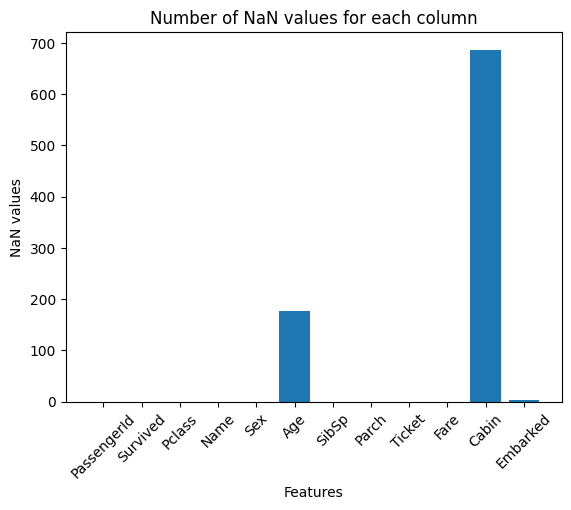

In [12]:
x_bar = np.arange(len(ser_nan_ratios.index))
plt.bar(x_bar , ser_nan_ratios.values)
plt.xticks(x_bar, ser_nan_ratios.index, rotation=45)
plt.xlabel("Features")
plt.ylabel("NaN values")
plt.title("Number of NaN values for each column")
plt.show()

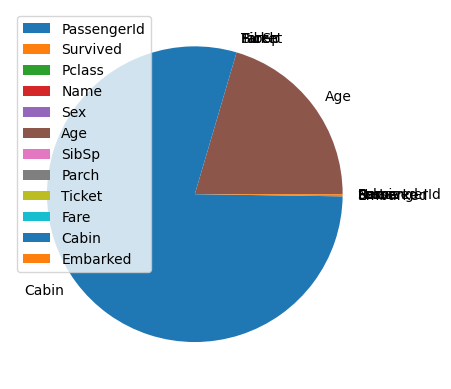

In [13]:
plt.pie(ser_nan_ratios.values / df.shape[0], labels=ser_nan_ratios.index)
plt.legend()
plt.show()

In [17]:
#check if dataset is imbalance or not
ser_count = df['Survived'].value_counts()

In [15]:
list_survived_ratio = [ ser_count[idx]/df.shape[0] for idx in ser_count.index]
print(list_survived_ratio)

[0.6161616161616161, 0.3838383838383838]


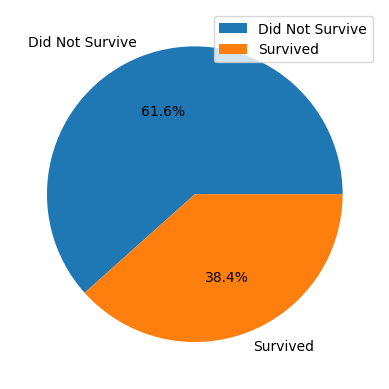

In [16]:
plt.pie(list_survived_ratio, labels=['Did Not Survive', 'Survived'],
        autopct='%1.1f%%')
plt.legend()
plt.show()

# 3-Data preparation

In [18]:
df_copy = df.copy()

In [19]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
# Drop PassengerId , Name, Cabin, and Ticket columns
df_copy.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace=True)
print(df_copy.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [21]:
# Fill NaN values for Age column
df_copy['Age'].fillna(value=df_copy['Age'].mean(), inplace=True)

In [22]:
# Drop rows with NaN values
df_copy.dropna(inplace=True)

In [23]:
df_copy.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
df_copy["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
# X : Dataset features
X = df_copy.drop('Survived', axis=1)

# y : Dataset label
y = df_copy['Survived']

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [29]:
# one-hot encode Sex and Embarked
X = pd.get_dummies(X)

In [30]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

print(f"train data shape {X_train.shape}")
print(f"test data shape {X_test.shape}")


train data shape (666, 10)
test data shape (223, 10)


0    408
1    258
Name: Survived, dtype: int64
[0.6126126126126126, 0.38738738738738737]


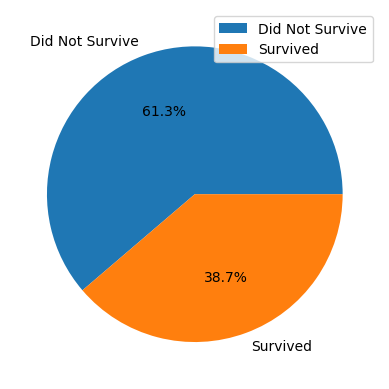

In [32]:
ser_count = y_train.value_counts()
list_survived_ratio = [ ser_count[idx]/y_train.shape[0] for idx in ser_count.index]

print(ser_count)
print(list_survived_ratio)

plt.pie(list_survived_ratio, labels=['Did Not Survive', 'Survived'],
        autopct='%1.1f%%')
plt.legend()
plt.show()

In [33]:
# Balancing data
over_sampling = SMOTE()
X_train, y_train = over_sampling.fit_resample(X_train, y_train)
y_train.value_counts()

1    408
0    408
Name: Survived, dtype: int64

In [34]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [36]:
# Scaling data
sc = StandardScaler()
X_train[['Age',  'Fare']] = sc.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age',  'Fare']] = sc.transform(X_test[['Age', 'Fare']])

In [37]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.569080,0,0,-0.516439,1,0,0,0,1
1,2,1.540827,0,0,-0.451863,1,0,0,0,1
2,2,0.011078,0,0,-0.660494,0,1,0,0,1
3,1,0.011078,0,0,-0.132956,0,1,0,0,1
4,3,-1.096556,1,0,-0.373295,1,0,1,0,0


# 4- Build Models


In [38]:
decisionTreemodel = DecisionTreeClassifier()
randomForestModel = RandomForestClassifier()
svmModel = SVC()
knnModel = KNeighborsClassifier(n_neighbors=7)
naiveBayesModel = GaussianNB()

# 5- Training Models (Modeling)

In [39]:
decisionTreemodel.fit(X_train, y_train)
randomForestModel.fit(X_train, y_train)
svmModel.fit(X_train, y_train)
knnModel.fit(X_train, y_train)
naiveBayesModel.fit(X_train, y_train)

GaussianNB()

# 6- Predict

In [40]:
# Decision Tree
decisionTreePrediction = decisionTreemodel.predict(X_test)

# Random Forest Prediction
randomForestPrediction = randomForestModel.predict(X_test)

# Support Vector Machine
svmPrediction = svmModel.predict(X_test)

# K-NN
knnPrediction = knnModel.predict(X_test)

# Naive Bayes
naiveBayesPrediction = naiveBayesModel.predict(X_test)

# 7- Evaluation

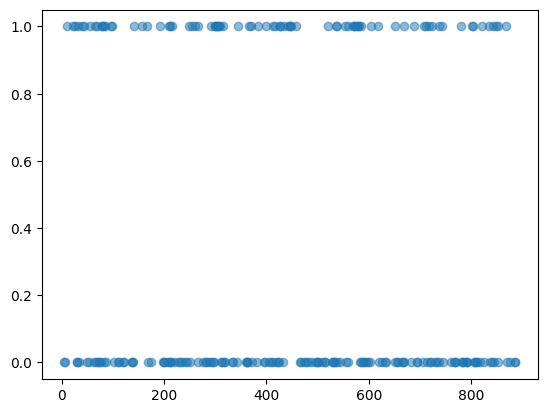

In [41]:
# Evaluate models using confusion matrix
plt.scatter(y_test.index,y_test, alpha=0.5)
plt.show()

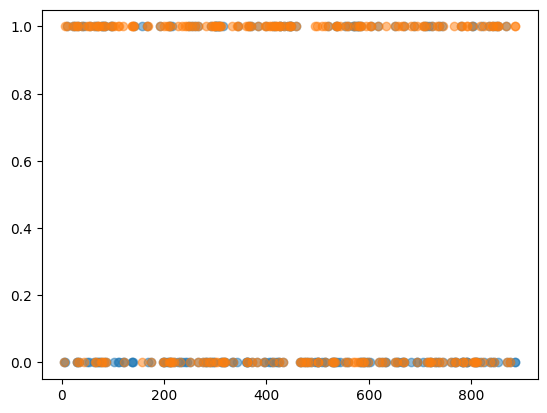

In [42]:
plt.scatter(y_test.index,y_test, alpha=0.5)
plt.scatter(y_test.index,knnPrediction, alpha=0.5)
plt.show()

In [43]:
def Evaluate_classification_model(actual_values, predicted_values):
  return {
        "cinfusion_matrix" : confusion_matrix(predicted_values, actual_values),
        "accuracy" : accuracy_score(predicted_values, actual_values),
        "precision" : precision_score(predicted_values, actual_values),
        "recall" : recall_score(predicted_values, actual_values),
        "F1" : f1_score(predicted_values, actual_values)
    }


def visualize_cinfusion_matrix(confusion_matrix, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                  display_labels=labels)
    disp.plot()
    plt.show()
    return

In [44]:
dict_predictions = {
    "DecisionTree" : decisionTreePrediction,
    "RandomForest" : randomForestPrediction,
    "KNN" : knnPrediction,
    "NaiveBayes" : naiveBayesPrediction,
    "SVM" : svmPrediction
}

==================== DecisionTree ====================



 cinfusion_matrix    [[110, 17], [31, 65]]
accuracy                         0.784753
precision                        0.792683
recall                           0.677083
F1                               0.730337
dtype: object 



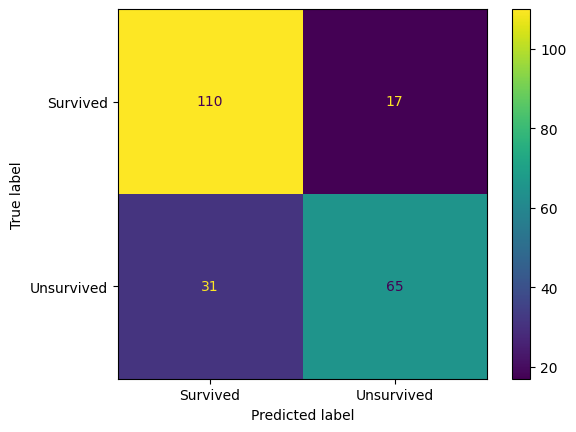

==================== RandomForest ====================



 cinfusion_matrix    [[78, 27], [63, 55]]
accuracy                        0.596413
precision                       0.670732
recall                          0.466102
F1                                  0.55
dtype: object 



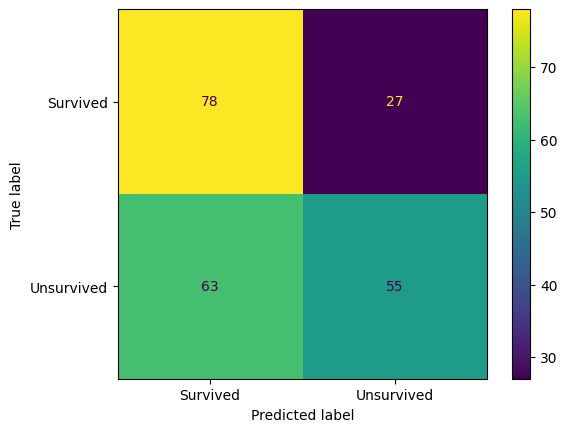

==================== KNN ====================



 cinfusion_matrix    [[77, 18], [64, 64]]
accuracy                        0.632287
precision                       0.780488
recall                               0.5
F1                              0.609524
dtype: object 



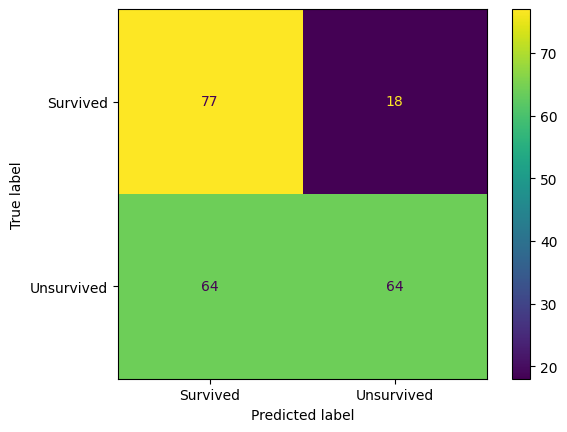

==================== NaiveBayes ====================



 cinfusion_matrix    [[0, 0], [141, 82]]
accuracy                       0.367713
precision                           1.0
recall                         0.367713
F1                             0.537705
dtype: object 



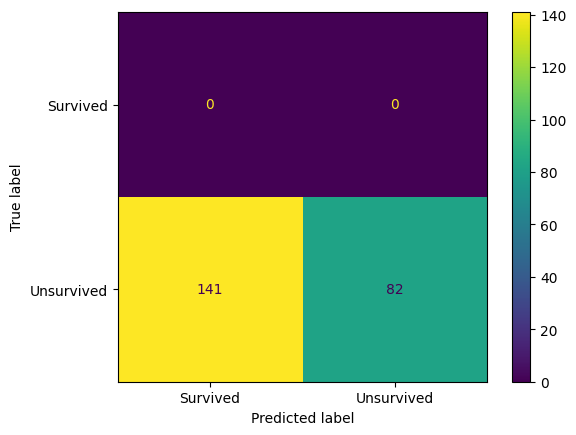

==================== SVM ====================



 cinfusion_matrix    [[140, 82], [1, 0]]
accuracy                       0.627803
precision                           0.0
recall                              0.0
F1                                  0.0
dtype: object 



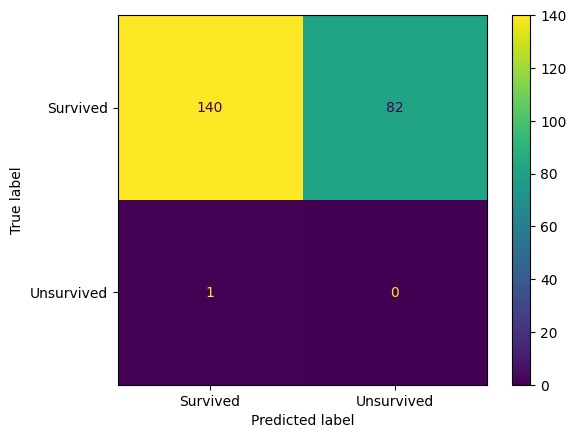

In [45]:
for modelName , y_predict in dict_predictions.items():
  print("="*50)
  print("="*20 , modelName, "="*20)
  print("="*50)
  print()
  print()

  dict_evaluation_info = Evaluate_classification_model(actual_values=y_test , predicted_values=y_predict)
  print("\n", pd.Series(dict_evaluation_info), "\n")

  # 5- Visualize confusion Matrix
  visualize_cinfusion_matrix(confusion_matrix=dict_evaluation_info["cinfusion_matrix"],
                            labels=["Survived", "Unsurvived"])